# K-Means Clustering Algorithm Implementation

This notebook guides you through implementing the K-Means clustering algorithm and evaluating the resulting clusters using Silhouette Score and Dunn Index. Follow the comments and instructions to complete the missing code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Step 0: Load and visualize the data
Load the data from the `npz` files and plot the instances.

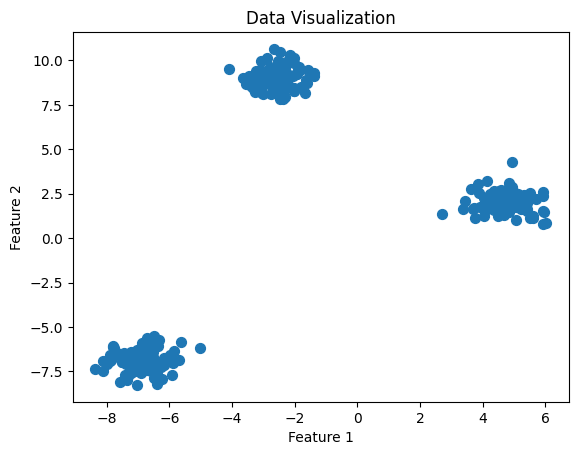

In [2]:
# Load the data from npz file
data = np.load('dataset1.npz')
X = data['data']

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Data Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Step 1: Initialize K-Means Algorithm
Define a function to initialize centroids randomly.

In [3]:
def initialize_centroids(X, k):
    """
    Randomly initialize centroids from the dataset.
    
    Parameters:
    X (numpy array): The dataset.
    k (int): Number of clusters.
    
    Returns:
    centroids (numpy array): Initialized centroids.
    """
    
    centroids = None

    ########## Your code goes here ##########
    indices = np.random.choice(X.shape[0], size=k, replace=False)
    centroids = X[indices]
    ##########################################

    return centroids

## Step 2: Compute distance 
Define the distance function in order to compute the distance from an instance to a centroid.

In [4]:
def compute_distance(point1, point2, metric='L2'):

    result = None

    if metric == 'L1':
        result =  np.sum(np.abs(point1 - point2))
    elif metric == 'L2':
        result = np.sqrt(np.sum((point1 - point2) ** 2))
    elif metric == 'cosine':
        dot_product = np.dot(point1, point2)
        norm_a = np.linalg.norm(point1)
        norm_b = np.linalg.norm(point2)
        result = 1 - dot_product / (norm_a * norm_b)
    else:
        return ValueError("Unsupported metric")
    
    return result

## Step 2: Assign Clusters
Define a function to assign each data point to the nearest centroid. Use the L2 distance. 

In [5]:
def assign_clusters(X, centroids, metric='L2'):
    """
    Assign each data point to the nearest centroid.
    
    Parameters:
    X (numpy array): The dataset.
    centroids (numpy array): Current centroids.
    
    Returns:
    idx (numpy array): Cluster assignments.
    """

    idx = None

    ########## Your code goes here ##########
    idx = np.zeros(X.shape[0], dtype=int)

    for i, p in enumerate(X):
        distances = [compute_distance(p, c, metric) for c in centroids]
        idx[i] = np.argmin(distances)
    #########################################

    return idx

## Step 3: Update Centroids
Define a function to update the centroids based on cluster assignments.

In [6]:
def update_centroids(X, labels, k):
    """
    Update centroids as the mean of assigned points.
    
    Parameters:
    X (numpy array): The dataset.
    labels (numpy array): Cluster assignments.
    k (int): Number of clusters.
    
    Returns:
    centroids (numpy array): Updated centroids.
    """

    centroids = None

    ########## Your code goes here ##########
    for c in range(k):
        points = X[labels.flatten() == c]
        new_centroid = np.mean(points, axis=0)
        centroids = new_centroid if centroids is None else np.vstack((centroids, new_centroid))
    ##########################################

    return centroids

## Step 4: K-Means Algorithm
Combine the above functions to complete the K-Means algorithm.

In [7]:
def k_means(X, k, metric='L2', max_iters=100, eps=1e-4):
    """
    Perform K-Means clustering.
    
    Parameters:
    X (numpy array): The dataset.
    k (int): Number of clusters.
    metric (str): Distance metric 
    max_iters (int): Maximum number of iterations.
    eps (float): Tolerance for convergence.
    
    Returns:
    tuple: Final centroids and cluster assignments.
    """
    centroids = initialize_centroids(X, k)
    labels = None

    for _ in range(max_iters):

        ########## Your code goes here ##########
        labels = assign_clusters(X, centroids, metric)
        new_centroids = update_centroids(X, labels, k)
        if np.linalg.norm(new_centroids - centroids) < eps:
            break
        centroids = new_centroids

        ##########################################
        
    return centroids, labels

## Step 5: Evaluation Metrics
### Silhouette Score

In [8]:
def compute_silhouette_score(X, labels, metric='L2'):
    """
    Compute the silhouette score for the clustering.
    
    Parameters:
    X (numpy array): The dataset.
    labels (numpy array): Cluster assignments.
    
    Returns:
    silhouette_score(float): Silhouette score.
    """

    silhouette_score = None

    ########## Your code goes here ##########
    silhouette_score = 0
    unique_labels = np.unique(labels)
    for i in range(X.shape[0]):
        same_cluster = X[labels.flatten() == labels[i]]
        other_cluster = X[labels.flatten() != labels[i]]
        a_i = (1 / (same_cluster.shape[0] - 1)) * np.sum([compute_distance(X[i], point, metric) for point in same_cluster if not np.array_equal(point, X[i])])
        b_i = np.inf
        for lbl in unique_labels:
            if lbl != labels[i]:
                other_cluster = X[labels == lbl]
                avg_dist = np.mean([
                    compute_distance(X[i], point, metric)
                    for point in other_cluster
                ])
                b_i = min(b_i, avg_dist)
        s_i = (b_i - a_i) / max(a_i, b_i)
        silhouette_score += s_i
    silhouette_score /= X.shape[0]
    ##########################################

    return silhouette_score

### Dunn Index

In [9]:
def compute_dunn_index(X, labels, metric='L2'):
    """
    Compute the Dunn Index for the clustering.

    Parameters:
    X (numpy array): The dataset of shape (n, d).
    labels (numpy array): Cluster assignments of shape (n,).
    metric (str): Distance metric ('L1', 'L2', 'cosine').

    Returns:
    dunn_index (float): Dunn Index.
    """

    dunn_index = None

    ########## Your code goes here ##########
    min_dist = min(
        compute_distance(X[i], X[j], metric)
        for i in range(X.shape[0])
        for j in range(X.shape[0])
        if labels[i] != labels[j]
    )
    max_dist = max(
        compute_distance(X[i], X[j], metric)
        for i in range(X.shape[0])
        for j in range(X.shape[0])
        if labels[i] == labels[j] and i != j
    )
    dunn_index = min_dist / max_dist
    ##########################################

    return dunn_index

## Step 6: Testing Your Implementation
Test the K-Means algorithm and evaluation metrics on a sample dataset. Change the number of clusters in order to make more experiments. 

Silhouette Score: 0.9083834454815233
Dunn Index: 2.0339628425725444


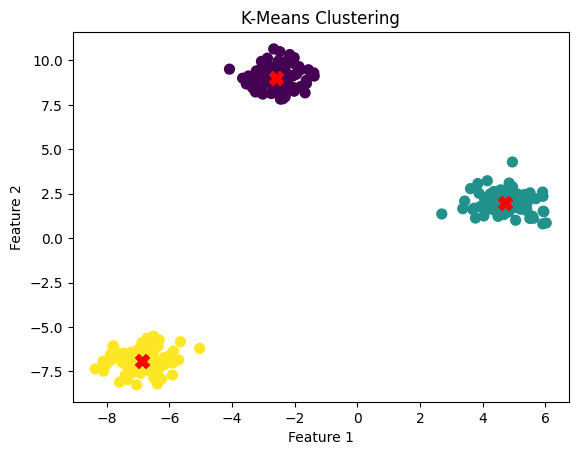

In [10]:
# Run K-Means
k = 3
metric = 'L2'
centroids, labels = k_means(X, k, metric)

# Evaluate
silhouette = compute_silhouette_score(X, labels, metric)
dunn = compute_dunn_index(X, labels, metric)

print(f"Silhouette Score: {silhouette}")
print(f"Dunn Index: {dunn}")

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
